<a href="https://colab.research.google.com/github/lahiruUD/OnlineCV/blob/main/PhonePricePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# make sure python ≥3.5 is available
import sys
assert sys.version_info >= (3, 5)
 
# imports basic libraries
import pandas as pd
import numpy as np
import os
 
# import data graphicaly representable libraries
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
 
# import Scikit-Learn library addons
import sklearn
from sklearn import linear_model
from sklearn import metrics
 
import warnings

In [ ]:
#import data sheet and read it
df = pd.read_excel(r'/content/mobilePhonePrice.xlsx')
df.head(5)

,name,ram(GB),frontCamera(MP),backCamera(MP),noOfCam(Front),noOfCam(Back),batteryCapacity(mAh),storage(GB),displaySize,year,osVersion,price(Rs.),model
0,Samsung Galaxy S7 Edge,4,5.0,12.0,1,1,3600,32,5.5,2016,6.0,39900,samsung
1,Samsung Galaxy S7,4,5.0,12.0,1,1,3000,32,5.1,2016,6.0,36900,samsung
2,Samsung Galaxy S8+ (64GB),4,8.0,12.0,1,2,3500,64,6.2,2017,7.0,74900,samsung
3,Samsung Galaxy S8,4,5.0,12.0,1,2,3000,32,5.8,2017,7.0,66500,samsung
4,Samsung Galaxy S8 Active,4,5.0,12.0,1,2,4000,32,5.8,2017,7.0,148570,samsung


In [ ]:
#drop attribute coloum of "name".no need it
df = df.drop(columns=['name'])
df.head(5)

,ram(GB),frontCamera(MP),backCamera(MP),noOfCam(Front),noOfCam(Back),batteryCapacity(mAh),storage(GB),displaySize,year,osVersion,price(Rs.),model
0,4,5.0,12.0,1,1,3600,32,5.5,2016,6.0,39900,samsung
1,4,5.0,12.0,1,1,3000,32,5.1,2016,6.0,36900,samsung
2,4,8.0,12.0,1,2,3500,64,6.2,2017,7.0,74900,samsung
3,4,5.0,12.0,1,2,3000,32,5.8,2017,7.0,66500,samsung
4,4,5.0,12.0,1,2,4000,32,5.8,2017,7.0,148570,samsung


In [ ]:
#check how meny rows and coloumns
df.info

<bound method DataFrame.info of      ram(GB)  frontCamera(MP)  backCamera(MP)  ...  osVersion  price(Rs.)    model
0          4              5.0            12.0  ...        6.0       39900  samsung
1          4              5.0            12.0  ...        6.0       36900  samsung
2          4              8.0            12.0  ...        7.0       74900  samsung
3          4              5.0            12.0  ...        7.0       66500  samsung
4          4              5.0            12.0  ...        7.0      148570  samsung
..       ...              ...             ...  ...        ...         ...      ...
286        6             32.0            64.0  ...       11.0       45000  samsung
287        6             32.0            64.0  ...       11.0       42300  samsung
288        8             32.0            64.0  ...       11.0       57000  samsung
289        3              8.0            48.0  ...       11.0       44500  samsung
290        4             20.0            48.0  ...     

In [ ]:
#check for null values
df.isnull().any()

ram(GB)                 False
frontCamera(MP)         False
backCamera(MP)          False
noOfCam(Front)          False
noOfCam(Back)           False
batteryCapacity(mAh)    False
storage(GB)             False
displaySize             False
year                    False
osVersion               False
price(Rs.)              False
model                   False
dtype: bool

In [ ]:
#check for attribute types
df.dtypes

ram(GB)                   int64
frontCamera(MP)         float64
backCamera(MP)          float64
noOfCam(Front)            int64
noOfCam(Back)             int64
batteryCapacity(mAh)      int64
storage(GB)               int64
displaySize             float64
year                      int64
osVersion               float64
price(Rs.)                int64
model                    object
dtype: object

In [ ]:
#take numerical valued coloumns for plot graphs
numCols = df.columns[df.dtypes==float].tolist() + df.columns[df.dtypes==int].tolist()
numCols

['frontCamera(MP)',
 'backCamera(MP)',
 'displaySize',
 'osVersion',
 'ram(GB)',
 'noOfCam(Front)',
 'noOfCam(Back)',
 'batteryCapacity(mAh)',
 'storage(GB)',
 'year',
 'price(Rs.)']

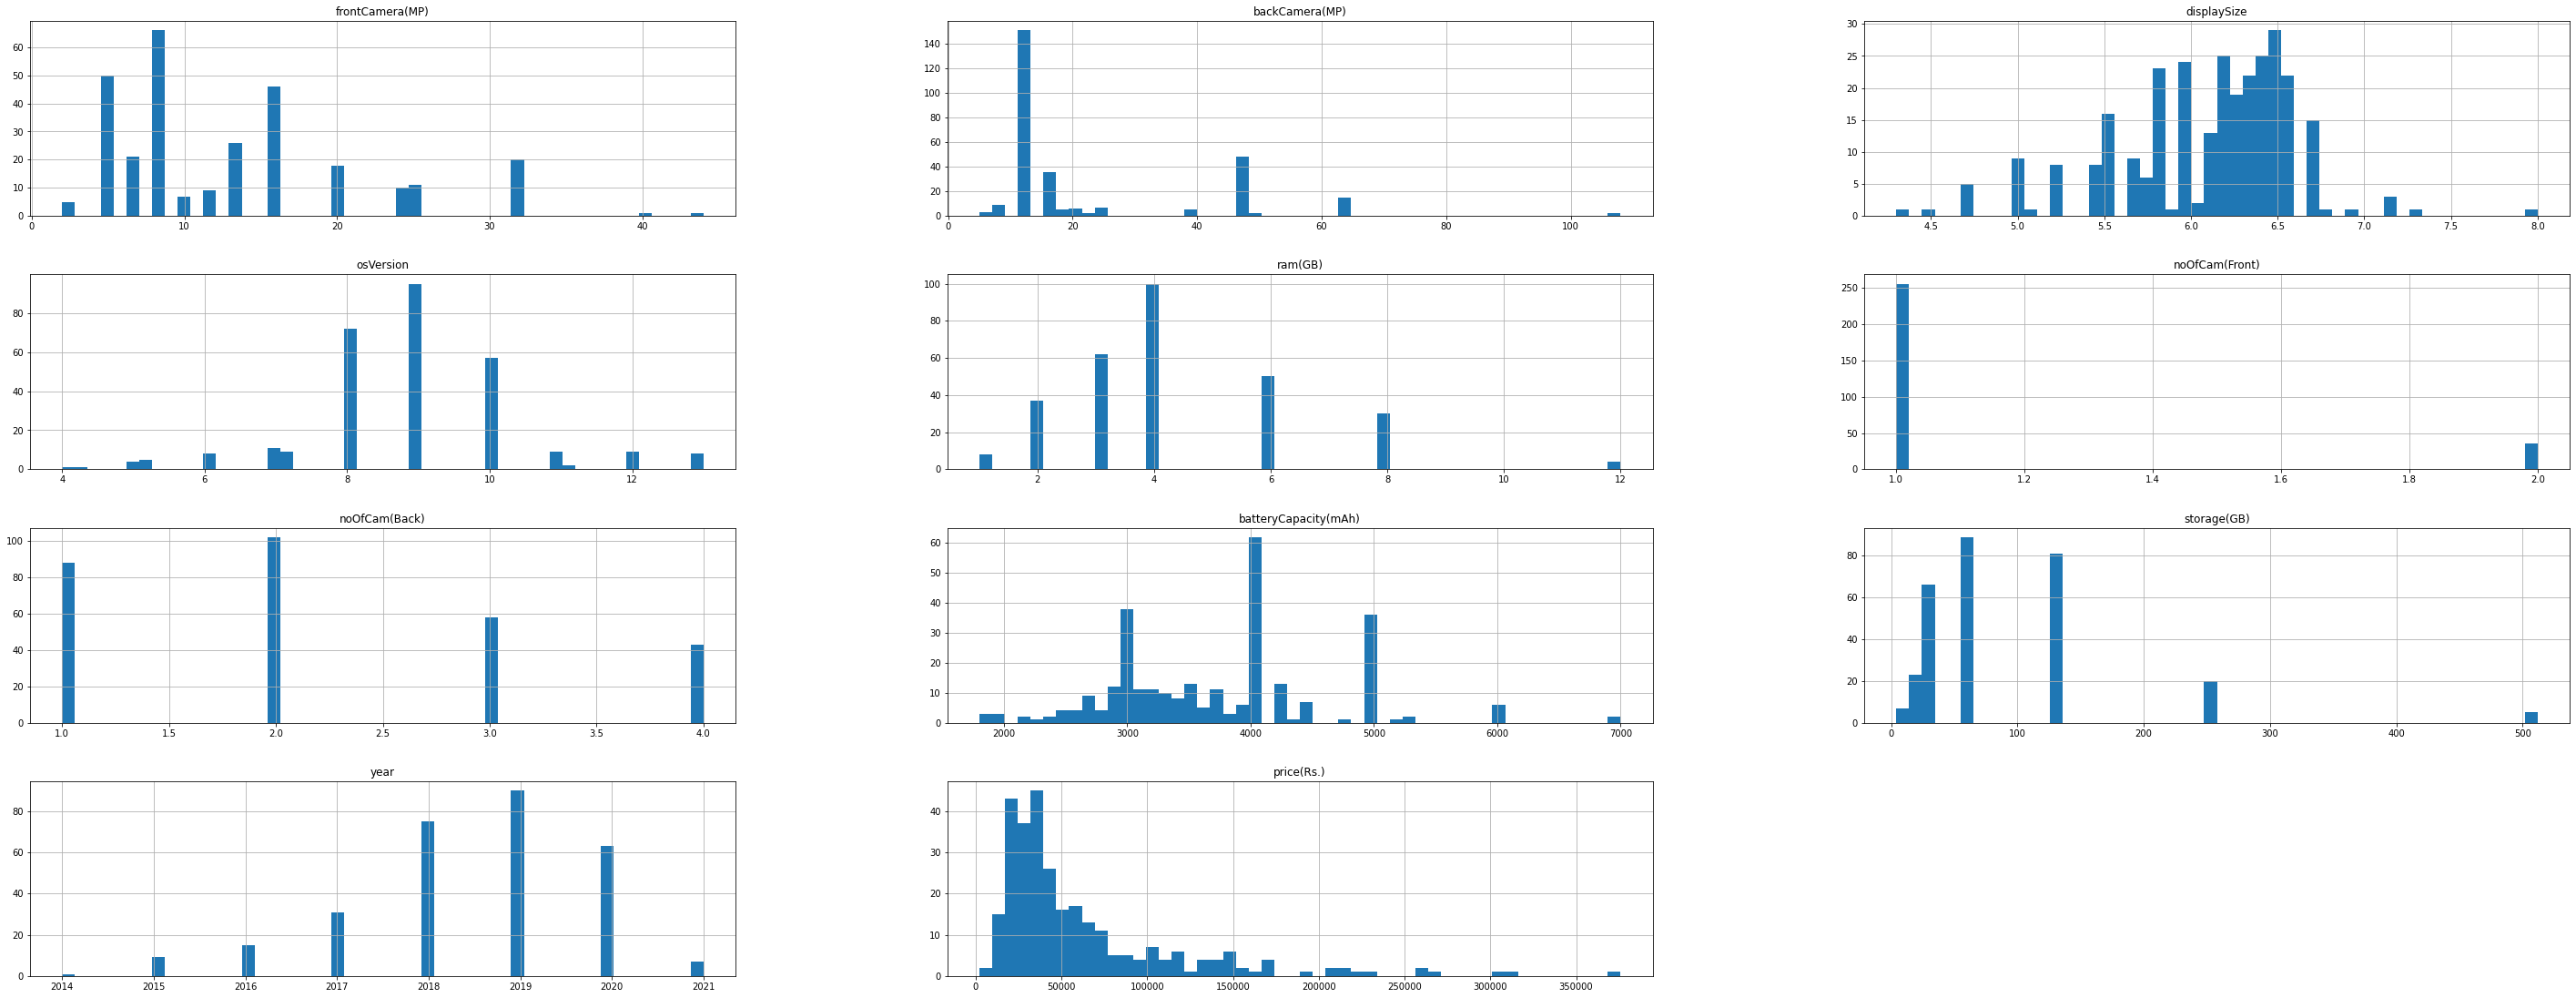

In [ ]:
df[numCols].hist(bins=50,figsize=(50,50), layout=(10,3), rwidth=5)
plt.show()

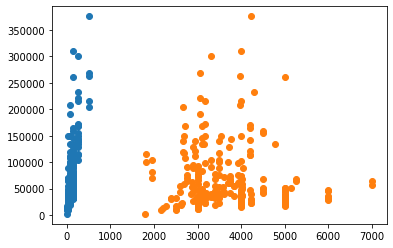

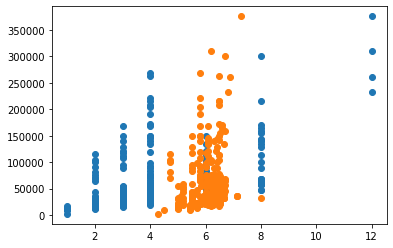

In [ ]:
#some scatter plots of price vary with the attributes
plt.scatter(df["storage(GB)"],df["price(Rs.)"])
plt.scatter(df["batteryCapacity(mAh)"],df["price(Rs.)"])
plt.show()
plt.scatter(df["ram(GB)"],df["price(Rs.)"])
plt.scatter(df["displaySize"],df["price(Rs.)"])
plt.show()

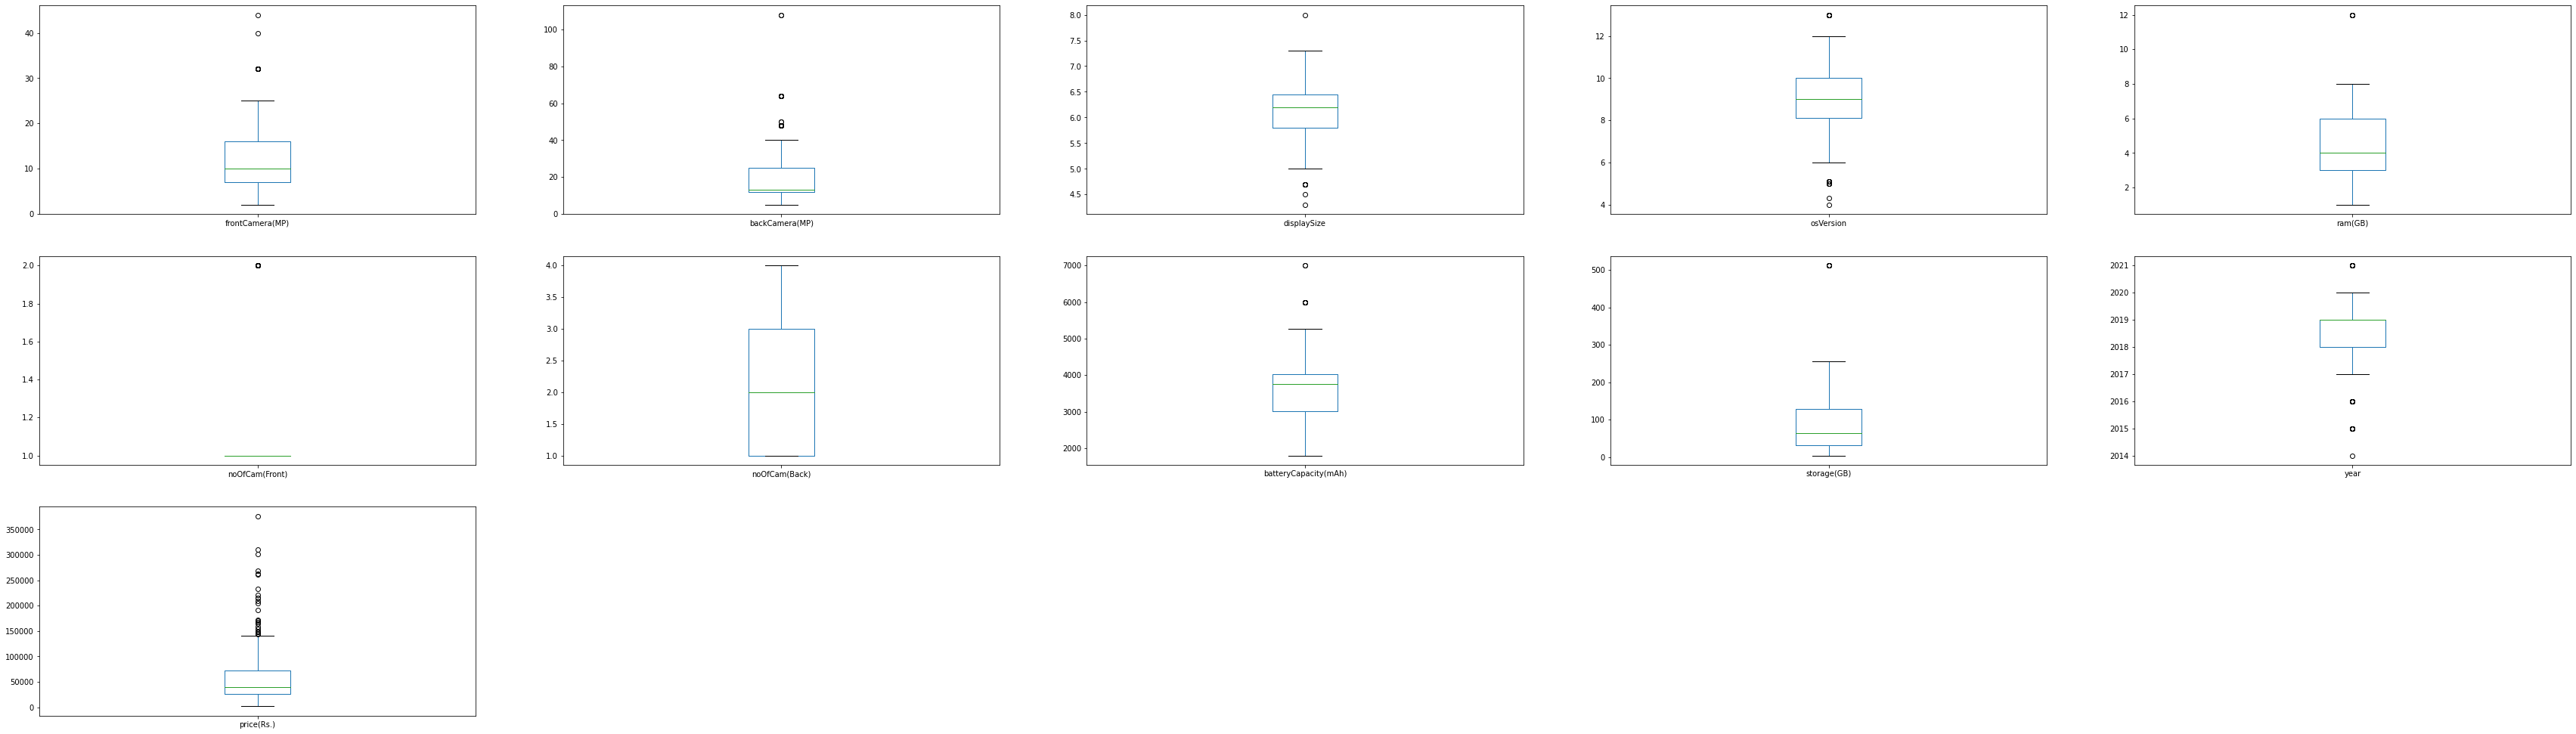

In [ ]:
#some box plots
df[numCols].plot(kind='box',subplots = True,figsize=(60,60),layout = (10,5),sharex = False, sharey = False)
plt.show()

In [ ]:
#take categorical valued column for one hot encoding
from sklearn.preprocessing import OneHotEncoder

oneHotEncoder=OneHotEncoder()
encodedArray=oneHotEncoder.fit_transform(df[['model']]).toarray()

In [ ]:
encodedArray[270]#check array no 270

array([0., 0., 0., 0., 0., 0., 0., 1.])

In [ ]:
df = df.drop(columns=['model'])

In [ ]:
 #one hot encoded data putting into a new data frame
 encodedDf= pd.DataFrame(encodedArray, columns=['apple','htc','huawei','nokia','oppo','samsung','sony','xiaomi'])
 encodedDf

,apple,htc,huawei,nokia,oppo,samsung,sony,xiaomi
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
286,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
287,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
288,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
289,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#merge previous data frame with base one
df = pd.concat([df.reset_index(drop=True),encodedDf.reset_index(drop=True)], axis=1)
df.head(5)

,ram(GB),frontCamera(MP),backCamera(MP),noOfCam(Front),noOfCam(Back),batteryCapacity(mAh),storage(GB),displaySize,year,osVersion,price(Rs.),apple,htc,huawei,nokia,oppo,samsung,sony,xiaomi
0,4,5.0,12.0,1,1,3600,32,5.5,2016,6.0,39900,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,4,5.0,12.0,1,1,3000,32,5.1,2016,6.0,36900,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4,8.0,12.0,1,2,3500,64,6.2,2017,7.0,74900,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,5.0,12.0,1,2,3000,32,5.8,2017,7.0,66500,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5.0,12.0,1,2,4000,32,5.8,2017,7.0,148570,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
corr_matrix = df.corr() #see the corelation between other variable and price
corr_matrix["price(Rs.)"].sort_values(ascending=False)

price(Rs.)              1.000000
storage(GB)             0.755670
ram(GB)                 0.512004
apple                   0.493718
osVersion               0.449425
noOfCam(Front)          0.348523
noOfCam(Back)           0.172273
displaySize             0.164415
samsung                 0.155117
frontCamera(MP)         0.097213
sony                    0.051266
backCamera(MP)          0.042877
year                    0.035258
htc                    -0.017332
batteryCapacity(mAh)   -0.084952
oppo                   -0.098295
huawei                 -0.145653
nokia                  -0.179758
xiaomi                 -0.225649
Name: price(Rs.), dtype: float64

In [ ]:
#convert all data types to float for minmax scaler
df=df.astype(float)
df.dtypes


ram(GB)                 float64
frontCamera(MP)         float64
backCamera(MP)          float64
noOfCam(Front)          float64
noOfCam(Back)           float64
batteryCapacity(mAh)    float64
storage(GB)             float64
displaySize             float64
year                    float64
osVersion               float64
price(Rs.)              float64
apple                   float64
htc                     float64
huawei                  float64
nokia                   float64
oppo                    float64
samsung                 float64
sony                    float64
xiaomi                  float64
dtype: object

In [ ]:
subX=df.drop(['price(Rs.)'],axis=1) #set the variable for X,y
y=df[['price(Rs.)']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
tempX = scaler.fit_transform(subX)
X = pd.DataFrame(tempX, columns=subX.columns)
X.head(5)

,ram(GB),frontCamera(MP),backCamera(MP),noOfCam(Front),noOfCam(Back),batteryCapacity(mAh),storage(GB),displaySize,year,osVersion,apple,htc,huawei,nokia,oppo,samsung,sony,xiaomi
0,0.272727,0.071429,0.067961,0.0,0.000000,0.346154,0.055118,0.324324,0.285714,0.222222,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.272727,0.071429,0.067961,0.0,0.000000,0.230769,0.055118,0.216216,0.285714,0.222222,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.272727,0.142857,0.067961,0.0,0.333333,0.326923,0.118110,0.513514,0.428571,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.272727,0.071429,0.067961,0.0,0.333333,0.230769,0.055118,0.405405,0.428571,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.272727,0.071429,0.067961,0.0,0.333333,0.423077,0.055118,0.405405,0.428571,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1, random_state = 4)

In [ ]:
#fit the values for linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#check the Accuracy Score
score = lr.score(X_test, y_test) 
print("accuracy = ",score)

accuracy =  0.8308407546915606


In [ ]:
#predict the value from trained set
y_predict_lr=lr.predict(X_test)
#check the r2 score
r_square_lr=metrics.r2_score(y_test,y_predict_lr)
r_square_lr

0.8308407546915606

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

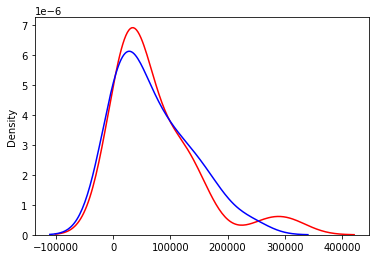

In [ ]:
#graphical representation between Y_test vs Y_predict
sns.distplot(y_test,hist=False,color="r",label="Actual value")
sns.distplot(y_predict_lr,hist=False,color="b",label="predict value")
plt.show

In [ ]:

print ("\n****Evaluations after linear regression model****")
print ("MAError  :",metrics.mean_absolute_error(y_test,y_predict_lr))
print ("MSError  :",metrics.mean_squared_error(y_test,y_predict_lr))
print ("RMSError :",np.sqrt(metrics.mean_squared_error(y_test,y_predict_lr)))


****Evaluations after linear regression model****
MAError  : 19702.433333333334
MSError  : 872261493.5666667
RMSError : 29534.07343335265


In [ ]:
#import random forest regresser
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1, random_state = 5)

In [ ]:
#fit the values for Random Forest  Regressor

rFReg=RandomForestRegressor(n_estimators=100,random_state=10)
rFReg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [ ]:
#predict the value from trained set
y_predict_rfr=rFReg.predict((X_test))

#check the r2 score
r_square_rfr=metrics.r2_score(y_test,y_predict_rfr)
r_square_rfr

0.9121815896131763

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

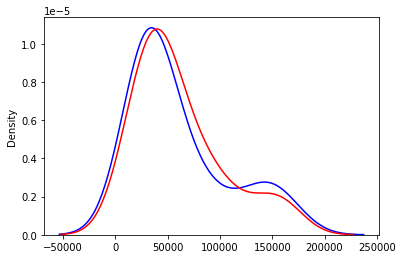

In [ ]:
#graphical representation between Y_test vs Y_predict
sns.distplot(y_test,hist=False,color="b",label="fitted")
sns.distplot(y_predict_rfr,hist=False,color="r",label="predictvalue")
plt.show


In [ ]:
print ("\n****Evaluations after Random Forest Model****")
print ("MAError  :",metrics.mean_absolute_error(y_test,y_predict_rfr))
print ("MSError  :",metrics.mean_squared_error(y_test,y_predict_rfr))
print ("RMSError :",np.sqrt(metrics.mean_squared_error(y_test,y_predict_rfr)))


****Evaluations after Random Forest Model****
MAError  : 9064.332222222223
MSError  : 179838345.3666459
RMSError : 13410.381999281224


In [ ]:
#import decission tree regresse
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1, random_state = 22)

In [ ]:
#fit the values for Decision Tree Regressor
dTReg=DecisionTreeRegressor(random_state=5,max_depth=15)

dTReg.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=5, splitter='best')

In [ ]:
#predict the value from trained set
y_predict_dtr=dTReg.predict((X_test))

#check the r2 score
r_square_dtr=metrics.r2_score(y_test,y_predict_dtr)
r_square_dtr

0.9217075278000816

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

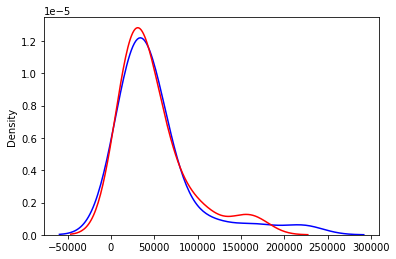

In [ ]:
#graphical representation between Y_test vs Y_predict
sns.distplot(y_test,hist=False,color="b",label="fitted")
sns.distplot(y_predict_dtr,hist=False,color="r",label="predictvalue")
plt.show

In [ ]:
print ("\n****Evaluations after Decision Tree Model****")
print ("MAError  :",metrics.mean_absolute_error(y_test,y_predict_dtr))
print ("MSError  :",metrics.mean_squared_error(y_test,y_predict_dtr))
print ("RMSError :",np.sqrt(metrics.mean_squared_error(y_test,y_predict_dtr)))


****Evaluations after Decision Tree Model****
MAError  : 7036.983333333334
MSError  : 161829823.45833334
RMSError : 12721.235138866561
